In [1]:
using NevanlinnaAC
using NevanlinnaAC: loss_fermi, gradient_function
using Optim

using DelimitedFiles, Plots

In [3]:
#load test data
Aw_exact = readdlm("./data/gaussian/A_gaussian_1.txt")
data  = readdlm("./data/gaussian/giwn_gaussian_1.txt")
xdata = convert(Vector{ComplexF64}, data[:,1])
ydata = data[:,2] + 1.0im * data[:,3];
ydata_noise = ydata .+ 1.e-8 * rand(ComplexF64, length(ydata));

In [14]:
ωmax = 4π;  Nω = 500; η=0.05;
w0, A0 = spectral_function(Fermi, xdata, ydata; ωmax, Nω, η);
w0_noise, A0_noise = spectral_function(Fermi, xdata, ydata_noise; ωmax, Nω, η);

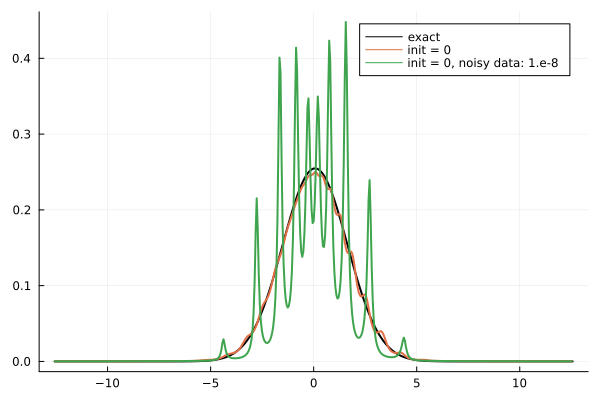

In [15]:
#plot init = 0 
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0, A0, line=(2), label="init = 0")
plot!(w0_noise, A0_noise, line=(2), label="init = 0, noisy data: 1.e-8")

In [8]:
#loss functions
loss = params -> loss_fermi(params, xdata, ydata; ωmax, Nω, η, λ = 1.e-5)

#11 (generic function with 1 method)

In [9]:
Nh = 6
p0 = zeros(2Nh)
res = Optim.optimize(loss, gradient_function(loss, p0), p0, LBFGS(), Optim.Options(show_trace=true, show_every=10))

Iter     Function value   Gradient norm 
     0     3.726491e-04     5.844223e-03
 * time: 0.02731609344482422


    10     1.498696e-04     1.097444e-03
 * time: 98.40711498260498


    20     1.468510e-04     5.364203e-05
 * time: 191.6078040599823


    30     1.468076e-04     1.341472e-08
 * time: 272.6022629737854


 * Status: success

 * Candidate solution
    Final objective value:     1.468076e-04

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.29e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.11e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.34e-15 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 9.15e-12 ≰ 0.0e+00
    |g(x)|                 = 5.45e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   291  (vs limit Inf)
    Iterations:    32
    f(x) calls:    97
    ∇f(x) calls:   97


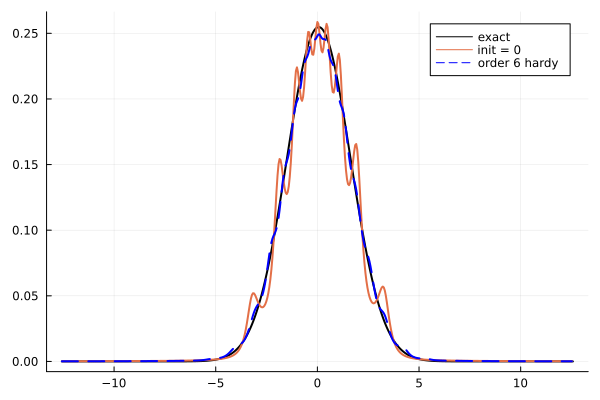

In [12]:
w1, A1= spectral_function(Fermi, xdata, ydata, res.minimizer; ωmax, Nω, η);
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0, A0, line=(2), label="init = 0")
plot!(w1, A1, line=(2, :dash, :blue), label="order $(Nh) hardy")

In [22]:
loss_noise = params -> loss_fermi(params, xdata, ydata_noise; ωmax, Nω, η, λ = 1.e-3)

#15 (generic function with 1 method)

In [23]:
res_noise = Optim.optimize(loss_noise, gradient_function(loss_noise, p0), p0, LBFGS(), Optim.Options(show_trace=true, show_every=10, iterations=200))

Iter     Function value   Gradient norm 
     0     2.682922e+01     4.220990e+01
 * time: 5.984306335449219e-5


    10     5.236703e+00     4.382435e-01
 * time: 84.96331787109375


    20     5.192643e+00     1.515140e-01
 * time: 179.5021059513092


    30     5.189117e+00     1.341824e-06
 * time: 262.32373094558716


 * Status: success

 * Candidate solution
    Final objective value:     5.189117e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.89e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.60e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.66e-15 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.13e-16 ≰ 0.0e+00
    |g(x)|                 = 5.74e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   299  (vs limit Inf)
    Iterations:    35
    f(x) calls:    99
    ∇f(x) calls:   99


In [24]:
w1_noise, A1_noise= spectral_function(Fermi, xdata, ydata, res_noise.minimizer; ωmax, Nω, η);

In [32]:
Nh2 = 12
res_noise2 = Optim.optimize(loss_noise, gradient_function(loss_noise, zeros(2Nh2)), zeros(2Nh2), LBFGS(), Optim.Options(show_trace=true, show_every=10))

Iter     Function value   Gradient norm 
     0     2.682922e+01     4.220990e+01
 * time: 5.2928924560546875e-5


    10     1.808029e+00     1.558241e+00
 * time: 129.92165303230286


    20     1.035233e+00     3.146886e-01
 * time: 241.3647780418396


    30     9.796976e-01     1.072400e-01
 * time: 349.05981397628784


    40     9.575507e-01     9.828990e-02
 * time: 466.65439105033875


    50     9.459770e-01     1.456283e-01
 * time: 588.6567170619965


    60     9.300791e-01     9.685167e-02
 * time: 694.2657570838928


    70     9.244602e-01     8.428812e-02
 * time: 808.2417650222778


    80     9.200604e-01     6.076434e-02
 * time: 918.6406910419464


    90     9.167061e-01     4.568314e-02
 * time: 1029.0886480808258


   100     9.098750e-01     1.750489e-01
 * time: 1151.2959189414978


   110     8.870910e-01     2.546847e-01
 * time: 1269.0426750183105


   120     8.135812e-01     5.554680e-01
 * time: 1404.9188780784607


   130     7.271795e-01     1.459899e-01
 * time: 1520.0698609352112


   140     6.800051e-01     7.962143e-02
 * time: 1628.7595520019531


   150     6.723364e-01     4.341219e-02
 * time: 1744.2951250076294


   160     6.701157e-01     2.130240e-02
 * time: 1851.793114900589


   170     6.688153e-01     2.625277e-02
 * time: 1966.3892359733582


   180     6.683754e-01     1.552198e-02
 * time: 2078.15829706192


   190     6.682551e-01     7.818954e-03
 * time: 2189.3222410678864


   200     6.681778e-01     3.422241e-03
 * time: 2296.5157380104065


   210     6.681722e-01     1.142648e-03
 * time: 2407.246509075165


   220     6.681584e-01     2.956223e-03
 * time: 2517.6466569900513


   230     6.680817e-01     6.019432e-03
 * time: 2632.6165359020233


   240     6.680707e-01     1.059198e-03
 * time: 2747.83842587471


   250     6.680694e-01     1.959541e-03
 * time: 2855.169208049774


   260     6.680687e-01     4.743493e-04
 * time: 2961.947040081024


   270     6.680680e-01     4.674537e-04
 * time: 3077.2273449897766


   280     6.680673e-01     3.203084e-04
 * time: 3196.274780035019


   290     6.680672e-01     1.885632e-04
 * time: 3307.435366868973


   300     6.680672e-01     4.117415e-05
 * time: 3418.444962978363


   310     6.680672e-01     6.367388e-05
 * time: 3537.2992770671844


   320     6.680672e-01     8.971641e-05
 * time: 3644.6064879894257


   330     6.680672e-01     8.346419e-05
 * time: 3764.015990972519


   340     6.680672e-01     4.544300e-05
 * time: 3879.4898149967194


   350     6.680671e-01     3.475512e-05
 * time: 3995.09672498703


   360     6.680671e-01     7.311125e-05
 * time: 4110.363771915436


   370     6.680671e-01     8.011476e-05
 * time: 4226.246315002441


   380     6.680671e-01     1.081590e-04
 * time: 4340.872199058533


   390     6.680671e-01     2.357095e-05
 * time: 4448.318428993225


   400     6.680671e-01     4.776231e-05
 * time: 4567.404402971268


   410     6.680671e-01     4.168228e-05
 * time: 4682.474250078201


   420     6.680671e-01     7.176929e-05
 * time: 4801.135488986969


   430     6.680671e-01     1.554070e-05
 * time: 4916.832537889481


   440     6.680671e-01     1.104518e-05
 * time: 5035.859416007996


   450     6.680671e-01     4.681255e-06
 * time: 5146.668703079224


   460     6.680671e-01     1.605961e-05
 * time: 5261.76687502861


   470     6.680671e-01     1.151102e-05
 * time: 5373.237282037735


   480     6.680671e-01     5.444712e-06
 * time: 5484.683364868164


   490     6.680671e-01     1.115324e-06
 * time: 5595.438126087189


   500     6.680671e-01     1.370966e-06
 * time: 5706.75848698616


   510     6.680671e-01     1.589949e-06
 * time: 5825.33488202095


   520     6.680671e-01     1.897379e-06
 * time: 5940.526000022888


   530     6.680671e-01     8.502653e-07
 * time: 6051.9483869075775


   540     6.680671e-01     3.463192e-07
 * time: 6166.928404092789


   550     6.680671e-01     5.544093e-07
 * time: 6285.795324087143


   560     6.680671e-01     5.270443e-07
 * time: 6401.904438972473


   570     6.680671e-01     1.495060e-06
 * time: 6518.423819065094


   580     6.680671e-01     5.031277e-07
 * time: 6630.1001880168915


   590     6.680671e-01     4.762375e-07
 * time: 6744.455369949341


   600     6.680671e-01     7.075325e-07
 * time: 6854.175697088242


   610     6.680671e-01     8.604171e-07
 * time: 6967.415162086487


   620     6.680671e-01     1.272085e-06
 * time: 7076.6072409152985


   630     6.680671e-01     2.949300e-07
 * time: 7181.786686897278


   640     6.680671e-01     1.741084e-07
 * time: 7288.470392942429


   650     6.680671e-01     4.934911e-07
 * time: 7407.275387048721


   660     6.680671e-01     1.721224e-07
 * time: 7511.631154060364


   670     6.680671e-01     1.463993e-07
 * time: 7618.811058044434


   680     6.680671e-01     6.133194e-08
 * time: 7733.6353878974915


   690     6.680671e-01     3.003009e-08
 * time: 7849.19123506546


   700     6.680671e-01     4.597402e-08
 * time: 7964.277811050415


   710     6.680671e-01     2.646339e-08
 * time: 8075.627503871918


   720     6.680671e-01     2.417472e-08
 * time: 8190.8968670368195


   730     6.680671e-01     1.760372e-08
 * time: 8302.508629083633


 * Status: success (objective increased between iterations)

 * Candidate solution
    Final objective value:     6.680671e-01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.47e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.05e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.22e-16 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.32e-16 ≰ 0.0e+00
    |g(x)|                 = 7.52e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   8383  (vs limit Inf)
    Iterations:    738
    f(x) calls:    2181
    ∇f(x) calls:   2181


In [35]:
w2_noise, A2_noise= spectral_function(Fermi, xdata, ydata, res_noise2.minimizer; ωmax, Nω, η);

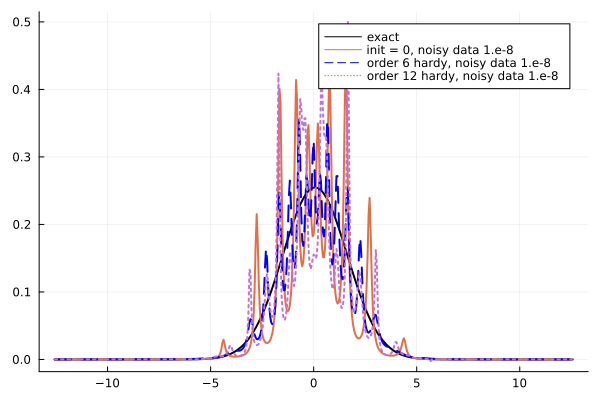

In [36]:
plot(Aw_exact[:,1], Aw_exact[:,2], line=(:black, 2), label="exact")
plot!(w0_noise, A0_noise, line=(2), label="init = 0, noisy data 1.e-8")
plot!(w1_noise, A1_noise, line=(2, :dash, :blue), label="order $(Nh) hardy, noisy data 1.e-8")
plot!(w2_noise, A2_noise, line=(2, :dot), label="order $(Nh2) hardy, noisy data 1.e-8")